# MSBA 315 Assignment 5: Prediction of Used Cars Price

# Importing the Necessary Libraries

In [10]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Loading the Datasets

In [ ]:
os.chdir(r'C:\Users\samer\OneDrive - American University of Beirut\Desktop\Assignment5')

cars_train = pd.read_csv('cars_train.csv', encoding='utf8')

In [ ]:
cars_train.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,posting_date
0,7226069143,indianapolis,3495,2005.0,lincoln,lse,good,8 cylinders,gas,181000.0,automatic,rwd,sedan,silver,in,39.640500,-86.311800,2020-11-05T16:19:56-0500
1,7233322668,medford-ashland,11995,2011.0,subaru,impreza,good,4 cylinders,gas,69408.0,automatic,4wd,wagon,blue,or,45.524894,-122.656061,2020-11-18T15:45:51-0800
2,7239134076,austin,68990,2016.0,porsche,cayman gts coupe 2d,good,NaN,gas,7923.0,automatic,rwd,coupe,red,tx,30.260000,-97.740000,2020-11-30T02:13:53-0600
3,7238509078,hawaii,17900,2011.0,bmw,535i,NaN,NaN,gas,50193.0,automatic,NaN,sedan,black,hi,21.293854,-157.837158,2020-11-28T13:57:30-1000
4,7236364831,daytona beach,9500,2006.0,NaN,mazada miata,excellent,4 cylinders,gas,52864.0,automatic,rwd,convertible,blue,fl,29.172023,-81.027367,2020-11-24T12:48:43-0500


In [ ]:
print('The training dataset has {} rows and {} columns'.format(cars_train.shape[0], cars_train.shape[1]))

The training dataset has 320749 rows and 18 columns


# Discovering the Datasets

In [ ]:
print(cars_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320749 entries, 0 to 320748
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            320749 non-null  int64  
 1   region        320749 non-null  object 
 2   price         320749 non-null  int64  
 3   year          320006 non-null  float64
 4   manufacturer  308004 non-null  object 
 5   model         317348 non-null  object 
 6   condition     185823 non-null  object 
 7   cylinders     200831 non-null  object 
 8   fuel          318505 non-null  object 
 9   odometer      281926 non-null  float64
 10  transmission  319039 non-null  object 
 11  drive         226666 non-null  object 
 12  type          241851 non-null  object 
 13  paint_color   222189 non-null  object 
 14  state         320749 non-null  object 
 15  lat           315562 non-null  float64
 16  long          315562 non-null  float64
 17  posting_date  320730 non-null  object 
dtypes: f

In [ ]:
cars_train["region"] = cars_train["region"].astype("category")
cars_train["manufacturer"] = cars_train["manufacturer"].astype("category")
cars_train["model"] = cars_train["model"].astype("category")
cars_train["condition"] = cars_train["condition"].astype("category")
cars_train["cylinders"] = cars_train["cylinders"].astype("category")
cars_train["fuel"] = cars_train["fuel"].astype("category")
cars_train["transmission"] = cars_train["transmission"].astype("category")
cars_train["drive"] = cars_train["drive"].astype("category")
cars_train["type"] = cars_train["type"].astype("category")
cars_train["paint_color"] = cars_train["paint_color"].astype("category")
cars_train["state"] = cars_train["state"].astype("category")
#cars_train['posting_date'] = pd.to_datetime(cars_train['posting_date'], errors='coerce')

In [ ]:
print('The training dataset contains the following columns:\n {}'.format(cars_train.columns.values))

The training dataset contains the following columns:
 ['id' 'region' 'price' 'year' 'manufacturer' 'model' 'condition'
 'cylinders' 'fuel' 'odometer' 'transmission' 'drive' 'type' 'paint_color'
 'state' 'lat' 'long' 'posting_date']


In [ ]:
cars_train.describe(include=['number'])

,id,price,year,odometer,lat,long
count,3.207490e+05,3.207490e+05,320006.000000,2.819260e+05,315562.000000,315562.000000
mean,7.235234e+09,3.867085e+04,2010.740930,9.685220e+04,38.536585,-94.351229
std,4.591287e+06,7.418730e+06,8.858039,2.739514e+05,5.853855,18.060558
min,7.209028e+09,0.000000e+00,1900.000000,0.000000e+00,-79.809640,-159.713745
25%,7.231955e+09,4.900000e+03,2008.000000,4.093500e+04,34.606000,-110.866049
50%,7.236410e+09,1.099500e+04,2013.000000,8.776700e+04,39.260000,-88.310560
75%,7.239315e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.024100
max,7.241019e+09,2.857993e+09,2021.000000,1.234598e+08,76.781734,150.898969


In [ ]:
cars_train.describe(include=['category'])

,region,manufacturer,model,condition,cylinders,fuel,transmission,drive,type,paint_color,state
count,320749,308004,317348,185823,200831,318505,319039,226666,241851,222189,320749
unique,405,43,25970,6,8,5,3,3,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,automatic,4wd,sedan,white,ca
freq,2712,55793,5841,81099,74065,279660,277454,97765,64707,57891,36019


# 1. Baseline System

## Preprocessing

### Dropping Unecessary Variables

In [ ]:
cars_train.drop(['id', 'state', 'region', 'lat', 'long', 'posting_date'], axis = 1, inplace = True)

### Checking for Null Values

In [ ]:
print(cars_train.isnull().sum())

price                0
year               743
manufacturer     12745
model             3401
condition       134926
cylinders       119918
fuel              2244
odometer         38823
transmission      1710
drive            94083
type             78898
paint_color      98560
dtype: int64


#### In my opinion, rows which contain Null Year, Null Model, Null Fuel, Null Transmission and Null Manufacturer should be dropped

In [ ]:
cars_train.dropna(subset=['year','manufacturer','model', 'fuel', 'transmission'], inplace=True)

print(cars_train.shape)

(301558, 12)


In [ ]:
cars_train['condition'].fillna((cars_train['condition'].mode()[0]),inplace=True)
cars_train['cylinders'].fillna((cars_train['cylinders'].mode()[0]),inplace=True)
cars_train['odometer'].fillna((cars_train['odometer'].mean()),inplace=True)
cars_train['drive'].fillna((cars_train['drive'].mode()[0]),inplace=True)
cars_train['type'].fillna((cars_train['type'].mode()[0]),inplace=True)
cars_train['paint_color'].fillna((cars_train['paint_color'].mode()[0]),inplace=True)

print(cars_train.shape)

(301558, 12)


In [ ]:
print(cars_train.isnull().sum())

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64


### Removing Outliers

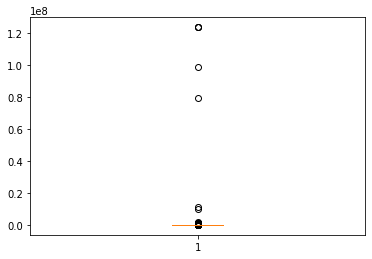

In [ ]:
plt.boxplot(cars_train['price'])
plt.show()

In [ ]:
def outlier(df,col):
    q1,q3 = df[col].quantile(0.25),df[col].quantile(0.75)
    iqr=q3-q1
    lower_fence=q1-1.5*iqr
    upper_fence=q3+1.5*iqr
    outliers=[x for x in df[col] if x < lower_fence or x > upper_fence]
    outliers_removed = df.loc[(df[col]> lower_fence) & (df[col] < upper_fence)]
    return outliers_removed

In [ ]:
cars_train=outlier(cars_train,'price')
cars_train=outlier(cars_train,'odometer')

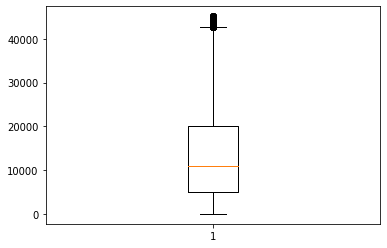

In [ ]:
plt.boxplot(cars_train['price'])
plt.show()

### Selecting the Most Important Predictors

In [ ]:
X = cars_train[['year', 'manufacturer', 'condition', 'odometer', 'model']]
y = cars_train[['price']]

### Splitting the Numerical and Categorical Features

In [ ]:
X_num = X.select_dtypes(include=[np.number])
X_cat = X.select_dtypes(exclude=[np.number])

In [ ]:
X_num.head()

,year,odometer
0,2005.0,181000.000000
1,2011.0,69408.000000
3,2011.0,50193.000000
5,2008.0,96129.042601
6,2014.0,185000.000000


In [ ]:
X_cat.head()

,manufacturer,condition,model
0,lincoln,good,lse
1,subaru,good,impreza
3,bmw,good,535i
5,nissan,good,armada se
6,ford,good,f-350


### Ordinal Encoding

In [ ]:
ordinal_encoder = OrdinalEncoder()

X_cat_encoded = ordinal_encoder.fit_transform(X_cat)
X_cat_encoded = pd.DataFrame(X_cat_encoded, columns = ['manufacturer', 'condition', 'model'])
X_cat_encoded

,manufacturer,condition,model
0,24.0,2.0,11489.0
1,36.0,2.0,10556.0
2,4.0,2.0,1773.0
3,30.0,2.0,2808.0
4,13.0,2.0,8064.0
...,...,...,...
289574,13.0,0.0,13977.0
289575,18.0,0.0,13869.0
289576,33.0,2.0,177.0
289577,4.0,0.0,1048.0


### Standard Scaler

In [ ]:
X_num_scaled = StandardScaler().fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled)
X_num_scaled

,0,1
0,-0.762139,1.640841
1,-0.007229,-0.422338
2,-0.007229,-0.777596
3,-0.384684,0.071697
4,0.370225,1.714795
...,...,...
289574,-0.384684,0.677641
289575,0.621862,-0.854989
289576,0.747680,-0.931051
289577,-1.139594,0.071697


### Concatinating

In [ ]:
X_prepared = pd.concat([X_cat_encoded, X_num_scaled], axis=1).reindex(X_cat_encoded.index)

X_prepared.shape

(289579, 5)

### Buidling the Model and Calculating Score

In [ ]:
baseline = LinearRegression()
cv = KFold(n_splits=10, random_state=1, shuffle=True)

baseline_cv_error = np.sqrt(-cross_val_score(baseline, X_prepared, y, cv=cv, scoring='neg_mean_squared_error'))

baseline_cv_error_mean = baseline_cv_error.mean()
baseline_cv_error_std = baseline_cv_error.std()

In [ ]:
print('The RMSE Mean Score is: ', baseline_cv_error_mean)
print('The RMSE Std Value is: ', baseline_cv_error_std)

The RMSE Mean Score is:  9771.017252315372
The RMSE Std Value is:  32.04628117110106


# 2. Feature Engineering

In [12]:
os.chdir(r'C:\Users\samer\OneDrive - American University of Beirut\Desktop\Assignment5')
cars_train_2 = pd.read_csv('cars_train.csv', encoding='utf8')

## Dropping Unecessary Variables

In [13]:
cars_train_2.drop(['id', 'state', 'region', 'lat', 'long', 'posting_date'], axis = 1, inplace = True)

## Checking for Null Values

In [14]:
print(cars_train_2.isnull().sum())

price                0
year               743
manufacturer     12745
model             3401
condition       134926
cylinders       119918
fuel              2244
odometer         38823
transmission      1710
drive            94083
type             78898
paint_color      98560
dtype: int64


#### In my opinion, rows which contain Null Year, Null Model, Null Fuel, Null Transmission and Null Manufacturer should be dropped

In [15]:
cars_train_2.dropna(subset=['year','manufacturer','model', 'fuel', 'transmission'], inplace=True)

print(cars_train_2.shape)

(301558, 12)


In [ ]:
print(cars_train_2.isnull().sum())

price                0
year                 0
manufacturer         0
model                0
condition       124674
cylinders       109954
fuel                 0
odometer         33794
transmission         0
drive            85251
type             71166
paint_color      90558
dtype: int64


## Replacing Null Values

#### We are going to replace Null values based on the mode of the variable grouped by reltated variables

In [ ]:
cars_train_2['cylinders'] = cars_train_2.groupby(['model'])['cylinders'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

cars_train_2['condition'] = cars_train_2.groupby(['year'])['condition'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

cars_train_2['odometer'] = cars_train_2.groupby(['condition'])['odometer'].apply(lambda x: x.fillna(x.mean()))

cars_train_2['drive'] = cars_train_2.groupby(['model'])['drive'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

cars_train_2['type'] = cars_train_2.groupby(['model'])['type'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

cars_train_2['paint_color'] = cars_train_2.groupby(['type'])['paint_color'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

In [ ]:
print(cars_train_2.isnull().sum())

price               0
year                0
manufacturer        0
model               0
condition           2
cylinders       15119
fuel                0
odometer            2
transmission        0
drive            8968
type             5119
paint_color      5119
dtype: int64


In [ ]:
cars_train_2['cylinders'] = cars_train_2.groupby(['manufacturer'])['cylinders'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

cars_train_2['condition'] = cars_train_2.groupby(['manufacturer'])['condition'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

cars_train_2['odometer'] = cars_train_2.groupby(['fuel'])['odometer'].apply(lambda x: x.fillna(x.mean()))

cars_train_2['drive'] = cars_train_2.groupby(['fuel'])['drive'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

cars_train_2['type'] = cars_train_2.groupby(['transmission'])['type'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

cars_train_2['paint_color'] = cars_train_2.groupby(['fuel'])['paint_color'].apply(lambda x: x.fillna(next(iter(x.mode()), np.nan)))

In [ ]:
print(cars_train_2.isnull().sum())

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64


## Removing Outliers

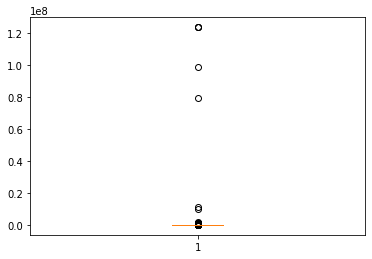

In [ ]:
plt.boxplot(cars_train_2['price'])
plt.show()

In [ ]:
cars_train_2=cars_train_2[(cars_train_2.price > 1000 ) & (cars_train_2.price <40000)]
cars_train_2.shape

(256491, 12)

In [ ]:
cars_train_2=cars_train_2[(cars_train_2.odometer > 1000 ) & (cars_train_2.odometer <250000)]
cars_train_2.shape

(249020, 12)

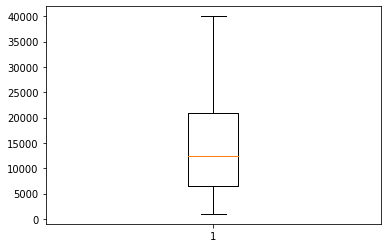

In [ ]:
plt.boxplot(cars_train_2['price'])
plt.show()

## Calculating the Age Variable

In [ ]:
cars_train_2['age'] = cars_train_2['year'].max() - cars_train_2['year']
cars_train_2.drop(['year'], axis=1, inplace=True)
print(cars_train_2['age'].value_counts())

4.0      22035
8.0      19839
7.0      19819
9.0      17960
6.0      17817
         ...  
100.0        1
99.0         1
88.0         1
108.0        1
76.0         1
Name: age, Length: 101, dtype: int64


## Splitting the Features into Numerical and categorical

In [ ]:
train_features_2 = cars_train_2.drop(["price"], axis=1) 
train_labels_2 = cars_train_2["price"]

train_num_2 = train_features_2.select_dtypes(include=[np.number])
train_cat_2 = train_features_2.select_dtypes(exclude=[np.number])

In [ ]:
train_num_2.head()

,odometer,age
0,181000.000000,16.0
1,69408.000000,10.0
3,50193.000000,10.0
5,84076.802937,13.0
6,185000.000000,7.0


In [ ]:
train_cat_2.head()

,manufacturer,model,condition,cylinders,fuel,transmission,drive,type,paint_color
0,lincoln,lse,good,8 cylinders,gas,automatic,rwd,sedan,silver
1,subaru,impreza,good,4 cylinders,gas,automatic,4wd,wagon,blue
3,bmw,535i,excellent,6 cylinders,gas,automatic,rwd,sedan,black
5,nissan,armada se,good,8 cylinders,gas,automatic,rwd,SUV,black
6,ford,f-350,excellent,8 cylinders,diesel,automatic,4wd,other,custom


## Choosing the Important Features

In [ ]:
train_num_2_imp = train_num_2[['age', 'odometer']]
train_cat_2_imp = train_cat_2

In [ ]:
train_num_2_imp.head()

,age,odometer
0,16.0,181000.000000
1,10.0,69408.000000
3,10.0,50193.000000
5,13.0,84076.802937
6,7.0,185000.000000


In [ ]:
train_cat_2_imp.head()

,manufacturer,model,condition,cylinders,fuel,transmission,drive,type,paint_color
0,lincoln,lse,good,8 cylinders,gas,automatic,rwd,sedan,silver
1,subaru,impreza,good,4 cylinders,gas,automatic,4wd,wagon,blue
3,bmw,535i,excellent,6 cylinders,gas,automatic,rwd,sedan,black
5,nissan,armada se,good,8 cylinders,gas,automatic,rwd,SUV,black
6,ford,f-350,excellent,8 cylinders,diesel,automatic,4wd,other,custom


## Trial 1 - Ordinal Encoding + Standard Scaler

#### Ordinal Encoding

In [ ]:
ordinal_encoder = OrdinalEncoder()

train_cat_2_imp_ordinal = ordinal_encoder.fit_transform(train_cat_2_imp)
train_cat_2_imp_ordinal = pd.DataFrame(train_cat_2_imp_ordinal, columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color'])
train_cat_2_imp_ordinal

,manufacturer,model,condition,cylinders,fuel,transmission,drive,type,paint_color
0,23.0,10274.0,2.0,6.0,2.0,0.0,2.0,9.0,9.0
1,35.0,9435.0,2.0,3.0,2.0,0.0,0.0,12.0,1.0
2,4.0,1547.0,0.0,5.0,2.0,0.0,2.0,9.0,0.0
3,29.0,2456.0,2.0,6.0,2.0,0.0,2.0,0.0,0.0
4,12.0,7199.0,0.0,6.0,0.0,0.0,0.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...
249015,7.0,9396.0,2.0,3.0,2.0,0.0,1.0,9.0,5.0
249016,12.0,12509.0,0.0,5.0,2.0,0.0,0.0,10.0,8.0
249017,17.0,12415.0,0.0,5.0,2.0,0.0,0.0,12.0,9.0
249018,4.0,883.0,0.0,5.0,2.0,0.0,2.0,9.0,5.0


#### Standard Scaler

In [ ]:
train_num_2_imp_standard = StandardScaler().fit_transform(train_num_2_imp)
train_num_2_imp_standard = pd.DataFrame(train_num_2_imp_standard)
train_num_2_imp_standard

,0,1
0,0.736484,1.565364
1,-0.030599,-0.508721
2,-0.030599,-0.865857
3,0.352943,-0.236082
4,-0.414140,1.639709
...,...,...
249015,0.352943,1.620416
249016,0.352943,0.597072
249017,-0.669834,-0.943659
249018,1.120026,0.187166


#### Concatinating the Dataframes

In [ ]:
X_prepared_1 = pd.concat([train_cat_2_imp_ordinal, train_num_2_imp_standard], axis=1).reindex(train_cat_2_imp_ordinal.index)

X_prepared_1.shape

(249020, 11)

#### Building the Model and Calculating the Scores

In [ ]:
model_1 = LinearRegression()
cv = KFold(n_splits=5, random_state=1, shuffle=True)

model_1_error = np.sqrt(-cross_val_score(model_1, X_prepared_1, train_labels_2, cv=cv, scoring='neg_mean_squared_error'))

model_1_error_mean = model_1_error.mean()
model_1_error_std = model_1_error.std()

In [ ]:
print('The RMSE Mean Score is: ', model_1_error_mean)
print('The RMSE Std Value is: ', model_1_error_std)

The RMSE Mean Score is:  6596.21355020055
The RMSE Std Value is:  36.59394815755368


## Trial 2 - One Hot Encoding + Standard Scaler

#### Redcing the Model Variable due to the Memory Problem

In [ ]:
train_cat_2_imp['model'].nunique()

17345

In [ ]:
train_cat_2_imp['model'].value_counts()

f-150                                                4362
silverado 1500                                       3047
camry                                                2379
1500                                                 2258
accord                                               2156
                                                     ... 
sorento sxl                                             1
forte lx 75k miles new tire                             1
325i wagon                                              1
ran b2500 cargo/work van                                1
es 330 sedan only 76k low miles leather moon roof       1
Name: model, Length: 17345, dtype: int64

We can take only Model types which have more than 50 occurences => Top 700 Car Model and map the rest as 'Other'

In [ ]:
need = train_cat_2_imp['model'].value_counts().index[:700]

train_cat_2_imp['model'] = np.where(train_cat_2_imp['model'].isin(need), train_cat_2_imp['model'], 'OTHER')

##### We lost some data, but our model variable is much more cleaner now

In [ ]:
train_cat_2_imp['model'].nunique()

701

In [ ]:
train_cat_2_imp['model'].value_counts()

OTHER                  74291
f-150                   4362
silverado 1500          3047
camry                   2379
1500                    2258
                       ...  
530i                      54
legacy 2.5i premium       54
rav4 limited              53
accent gls                53
cts cts-v coupe 2d        53
Name: model, Length: 701, dtype: int64

#### One Hot Encoding

In [ ]:
train_cat_2_imp.head()

,manufacturer,model,condition,cylinders,fuel,transmission,drive,type,paint_color
0,lincoln,OTHER,good,8 cylinders,gas,automatic,rwd,sedan,silver
1,subaru,impreza,good,4 cylinders,gas,automatic,4wd,wagon,blue
3,bmw,535i,excellent,6 cylinders,gas,automatic,rwd,sedan,black
5,nissan,OTHER,good,8 cylinders,gas,automatic,rwd,SUV,black
6,ford,f-350,excellent,8 cylinders,diesel,automatic,4wd,other,custom


In [ ]:
onehot_encoder = OneHotEncoder()

train_cat_2_imp_onehot = onehot_encoder.fit_transform(train_cat_2_imp)
train_cat_2_imp_onehot = pd.DataFrame(train_cat_2_imp_onehot.toarray())
train_cat_2_imp_onehot

,0,1,2,3,4,5,6,7,8,9,...,781,782,783,784,785,786,787,788,789,790
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
249016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
249017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
249018,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Standard Scaler

In [ ]:
train_num_2_imp_standard_1 = StandardScaler().fit_transform(train_num_2_imp)
train_num_2_imp_standard_1 = pd.DataFrame(train_num_2_imp_standard_1)
train_num_2_imp_standard_1

,0,1
0,0.736484,1.565364
1,-0.030599,-0.508721
2,-0.030599,-0.865857
3,0.352943,-0.236082
4,-0.414140,1.639709
...,...,...
249015,0.352943,1.620416
249016,0.352943,0.597072
249017,-0.669834,-0.943659
249018,1.120026,0.187166


#### Concatinating the Dataframes

In [ ]:
X_prepared_2 = pd.concat([train_cat_2_imp_onehot, train_num_2_imp_standard_1], axis=1).reindex(train_cat_2_imp_onehot.index)

X_prepared_2.shape

(249020, 793)

#### Building the Model and Calculating the Scores

In [ ]:
model_2 = LinearRegression()
cv = KFold(n_splits=5, random_state=1, shuffle=True)

model_2_error = np.sqrt(-cross_val_score(model_2, X_prepared_2, train_labels_2, cv=cv, scoring='neg_mean_squared_error'))

model_2_error_mean = model_2_error.mean()
model_2_error_std = model_2_error.std()

In [ ]:
print('The RMSE Mean Score is: ', model_2_error_mean)
print('The RMSE Std Value is: ', model_2_error_std)

The RMSE Mean Score is:  5279.685860896797
The RMSE Std Value is:  32.77990345159899


## Trial 3 - One Hot Encoding + MinMax Scaler

#### MinMax Scaler

In [ ]:
train_num_2_imp_minmax = MinMaxScaler().fit_transform(train_num_2_imp)
train_num_2_imp_minmax = pd.DataFrame(train_num_2_imp_minmax)
train_num_2_imp_minmax

,0,1
0,0.148148,0.723003
1,0.092593,0.274768
2,0.092593,0.197587
3,0.120370,0.333689
4,0.064815,0.739069
...,...,...
249015,0.120370,0.734900
249016,0.120370,0.513743
249017,0.046296,0.180773
249018,0.175926,0.425158


#### Concatinating the Dataframes

In [ ]:
X_prepared_3 = pd.concat([train_cat_2_imp_onehot, train_num_2_imp_minmax], axis=1).reindex(train_cat_2_imp_onehot.index)

X_prepared_3.shape

(249020, 793)

#### Building the Model and Calculating the Scores

In [ ]:
model_3 = LinearRegression()
cv = KFold(n_splits=5, random_state=1, shuffle=True)

model_3_error = np.sqrt(-cross_val_score(model_3, X_prepared_3, train_labels_2, cv=cv, scoring='neg_mean_squared_error'))

model_3_error_mean = model_3_error.mean()
model_3_error_std = model_3_error.std()

In [ ]:
print('The RMSE Mean Score is: ', model_3_error_mean)
print('The RMSE Std Value is: ', model_3_error_std)

The RMSE Mean Score is:  5279.708265126048
The RMSE Std Value is:  32.79031245194095


## Trial 4 - One Hot Encoding + Normalizer

#### Normalizer

In [ ]:
train_num_2_imp_normalizer = Normalizer().fit_transform(train_num_2_imp)
train_num_2_imp_normalizer = pd.DataFrame(train_num_2_imp_normalizer)
train_num_2_imp_normalizer

,0,1
0,0.000088,1.0
1,0.000144,1.0
2,0.000199,1.0
3,0.000155,1.0
4,0.000038,1.0
...,...,...
249015,0.000071,1.0
249016,0.000101,1.0
249017,0.000109,1.0
249018,0.000178,1.0


#### Concatinating the Dataframes

In [ ]:
X_prepared_4 = pd.concat([train_cat_2_imp_onehot, train_num_2_imp_normalizer], axis=1).reindex(train_cat_2_imp_onehot.index)

X_prepared_4.shape

(249020, 793)

#### Building the Model and Calculating the Scores

In [ ]:
model_4 = LinearRegression()
cv = KFold(n_splits=5, random_state=1, shuffle=True)

model_4_error = np.sqrt(-cross_val_score(model_4, X_prepared_4, train_labels_2, cv=cv, scoring='neg_mean_squared_error'))

model_4_error_mean = model_4_error.mean()
model_4_error_std = model_4_error.std()

In [ ]:
print('The RMSE Mean Score is: ', model_4_error_mean)
print('The RMSE Std Value is: ', model_4_error_std)

The RMSE Mean Score is:  7413.386117502378
The RMSE Std Value is:  24.694611964548375


## Trial 5 - One Hot Encoding + Robust Scaler

#### Robust Scaler

In [ ]:
train_num_2_imp_robust = RobustScaler(quantile_range=(25, 75)).fit_transform(train_num_2_imp)
train_num_2_imp_robust = pd.DataFrame(train_num_2_imp_robust)
train_num_2_imp_robust

,0,1
0,0.875,1.101089
1,0.125,-0.334340
2,0.125,-0.581506
3,0.500,-0.145652
4,-0.250,1.152541
...,...,...
249015,0.500,1.139189
249016,0.500,0.430955
249017,-0.500,-0.635351
249018,1.250,0.147268


#### Concatinating the Dataframes

In [ ]:
X_prepared_5 = pd.concat([train_cat_2_imp_onehot, train_num_2_imp_robust], axis=1).reindex(train_cat_2_imp_onehot.index)

X_prepared_5.shape

(249020, 793)

#### Building the Model and Calculating the Scores

In [ ]:
model_5 = LinearRegression()
cv = KFold(n_splits=5, random_state=1, shuffle=True)

model_5_error = np.sqrt(-cross_val_score(model_5, X_prepared_5, train_labels_2, cv=cv, scoring='neg_mean_squared_error'))

model_5_error_mean = model_5_error.mean()
model_5_error_std = model_5_error.std()

In [ ]:
print('The RMSE Mean Score is: ', model_5_error_mean)
print('The RMSE Std Value is: ', model_5_error_std)

The RMSE Mean Score is:  5279.691098842777
The RMSE Std Value is:  32.783160694318696


## Trial 6 - One Hot Encoding + Power Transformer

#### Power Transformer

In [ ]:
train_num_2_imp_power = PowerTransformer(method='yeo-johnson').fit_transform(train_num_2_imp)
train_num_2_imp_power = pd.DataFrame(train_num_2_imp_power)
train_num_2_imp_power

,0,1
0,0.995739,1.436005
1,0.264332,-0.405079
2,0.264332,-0.808968
3,0.669362,-0.122731
4,-0.269892,1.492882
...,...,...
249015,0.669362,1.478164
249016,0.669362,0.649373
249017,-0.751892,-0.903695
249018,1.269134,0.283719


#### Concatinating the Dataframes

In [ ]:
X_prepared_6 = pd.concat([train_cat_2_imp_onehot, train_num_2_imp_power], axis=1).reindex(train_cat_2_imp_onehot.index)

X_prepared_6.shape

(249020, 793)

#### Building the Model and Calculating the Scores

In [ ]:
model_6 = LinearRegression()
cv = KFold(n_splits=5, random_state=1, shuffle=True)

model_6_error = np.sqrt(-cross_val_score(model_6, X_prepared_6, train_labels_2, cv=cv, scoring='neg_mean_squared_error'))

model_6_error_mean = model_6_error.mean()
model_6_error_std = model_6_error.std()

In [ ]:
print('The RMSE Mean Score is: ', model_6_error_mean)
print('The RMSE Std Value is: ', model_6_error_std)

The RMSE Mean Score is:  4627.392696618477
The RMSE Std Value is:  21.848611286974105


## Trial 7 - Ordinal Encoding + Power Transformer

#### Ordinal Encoding

In [ ]:
ordinal_encoder = OrdinalEncoder()

train_cat_3_imp_ordinal = ordinal_encoder.fit_transform(train_cat_2_imp)
train_cat_3_imp_ordinal = pd.DataFrame(train_cat_3_imp_ordinal)
train_cat_3_imp_ordinal

,0,1,2,3,4,5,6,7,8
0,23.0,58.0,2.0,6.0,2.0,0.0,2.0,9.0,9.0
1,35.0,381.0,2.0,3.0,2.0,0.0,0.0,12.0,1.0
2,4.0,54.0,0.0,5.0,2.0,0.0,2.0,9.0,0.0
3,29.0,58.0,2.0,6.0,2.0,0.0,2.0,0.0,0.0
4,12.0,275.0,0.0,6.0,0.0,0.0,0.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...
249015,7.0,379.0,2.0,3.0,2.0,0.0,1.0,9.0,5.0
249016,12.0,490.0,0.0,5.0,2.0,0.0,0.0,10.0,8.0
249017,17.0,58.0,0.0,5.0,2.0,0.0,0.0,12.0,9.0
249018,4.0,58.0,0.0,5.0,2.0,0.0,2.0,9.0,5.0


#### Power Transformer

In [ ]:
train_num_3_imp_power = PowerTransformer(method='yeo-johnson').fit_transform(train_num_2_imp)
train_num_3_imp_power = pd.DataFrame(train_num_3_imp_power)
train_num_3_imp_power

,0,1
0,0.995739,1.436005
1,0.264332,-0.405079
2,0.264332,-0.808968
3,0.669362,-0.122731
4,-0.269892,1.492882
...,...,...
249015,0.669362,1.478164
249016,0.669362,0.649373
249017,-0.751892,-0.903695
249018,1.269134,0.283719


#### Concatinating the Dataframes

In [ ]:
X_prepared_7 = pd.concat([train_cat_3_imp_ordinal, train_num_3_imp_power], axis=1).reindex(train_cat_3_imp_ordinal.index)

X_prepared_7.shape

(249020, 11)

#### Building the Model and Calculating the Scores

In [ ]:
model_7 = LinearRegression()
cv = KFold(n_splits=5, random_state=1, shuffle=True)

model_7_error = np.sqrt(-cross_val_score(model_7, X_prepared_7, train_labels_2, cv=cv, scoring='neg_mean_squared_error'))

model_7_error_mean = model_7_error.mean()
model_7_error_std = model_7_error.std()

In [ ]:
print('The RMSE Mean Score is: ', model_7_error_mean)
print('The RMSE Std Value is: ', model_7_error_std)

The RMSE Mean Score is:  6068.555377182156
The RMSE Std Value is:  28.707525926112524


## Trial 8 - Get Dummies + Power Transformer

#### Get Dummies

In [ ]:
train_cat_3_dummies = pd.get_dummies(train_cat_2_imp).reset_index()
train_cat_3_dummies.drop("index", axis =1 , inplace= True)

train_cat_3_dummies

,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249015,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
249016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
249017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
249018,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Power Transformer

In [ ]:
train_num_3_imp_power = PowerTransformer(method='yeo-johnson').fit_transform(train_num_2_imp)
train_num_3_imp_power = pd.DataFrame(train_num_3_imp_power)
train_num_3_imp_power

,0,1
0,0.995739,1.436005
1,0.264332,-0.405079
2,0.264332,-0.808968
3,0.669362,-0.122731
4,-0.269892,1.492882
...,...,...
249015,0.669362,1.478164
249016,0.669362,0.649373
249017,-0.751892,-0.903695
249018,1.269134,0.283719


#### Concatinating the Dataframes

In [ ]:
X_prepared_8 = pd.concat([train_cat_3_dummies, train_num_3_imp_power], axis=1).reindex(train_cat_3_dummies.index)

X_prepared_8.shape

(249020, 793)

#### Building the Model and Calculating the Scores

In [ ]:
model_8 = LinearRegression()
cv = KFold(n_splits=5, random_state=1, shuffle=True)

model_8_error = np.sqrt(-cross_val_score(model_8, X_prepared_8, train_labels_2, cv=cv, scoring='neg_mean_squared_error'))

model_8_error_mean = model_8_error.mean()
model_8_error_std = model_8_error.std()

In [ ]:
print('The RMSE Mean Score is: ', model_8_error_mean)
print('The RMSE Std Value is: ', model_8_error_std)

The RMSE Mean Score is:  4627.392696618477
The RMSE Std Value is:  21.848611286974105


## Scores

In [ ]:
Scores = pd.DataFrame([ ['Ordinal Encoding + Standard Scaler', model_1_error_mean, model_1_error_std,],
                  ['One Hot Encoding + Standard Scaler', model_2_error_mean, model_2_error_std,],
                  ['One Hot Encoding + MinMax Scaler', model_3_error_mean, model_3_error_std,],
                  ['One Hot Encoding + Normalizer', model_4_error_mean, model_4_error_std,],
                  ['One Hot Encoding + Robust Scaler', model_5_error_mean, model_5_error_std,],
                  ['One Hot Encoding + Power Transformer', model_6_error_mean, model_6_error_std,],
                  ['Ordinal Encoding + Power Transformer', model_7_error_mean, model_7_error_std,],
                  ['Get Dummies + Power Transformer', model_8_error_mean, model_8_error_std,]],
              
                  columns=['Preprocessing + Feature Engineering', 'Mean RMSE', 'Std RMSE'])

Scores

,Preprocessing + Feature Engineering,Mean RMSE,Std RMSE
0,Ordinal Encoding + Standard Scaler,6596.213550,36.593948
1,One Hot Encoding + Standard Scaler,5279.685861,32.779903
2,One Hot Encoding + MinMax Scaler,5279.708265,32.790312
3,One Hot Encoding + Normalizer,7413.386118,24.694612
4,One Hot Encoding + Robust Scaler,5279.691099,32.783161
5,One Hot Encoding + Power Transformer,4627.392697,21.848611
6,Ordinal Encoding + Power Transformer,6068.555377,28.707526
7,Get Dummies + Power Transformer,4627.392697,21.848611


Dummy Encoding + Power Transformer had the best RMSE score. Continuing forward, we will drop the model variable due to the very high computational expense.

As for the most important set of features, the features with the highest impact on the model are the age, odometer, and cylinders. It is obvious that the age of the car has the greatest predictive power among all the features. As the age of the car increases, the price of the car decreases. 

The 'Model' of the car variable has nearly about 25,000 unique values which makes it impossible to OneHot encode all of them. The Ram of my computer wasn't able to handle 25,000 dummy rows. So, as a solution, i decided to take only 700 unique values which was the maximum number of features the Ram could handle and map the other values to 'Others'. This way the number of dummy rows decreased from 25,000 to 700.

# 3. Model Optimization and Selection

### Preprocessing

In [ ]:
train_num_final = train_num_2_imp  
train_cat_2_imp.drop('model', axis=1, inplace=True)
train_cat_final = train_cat_2_imp

In [ ]:
dummy_encoding = pd.get_dummies(train_cat_final).reset_index()
dummy_encoding.drop("index", axis =1 , inplace= True)

In [ ]:
power_transformer = PowerTransformer(method='yeo-johnson').fit_transform(train_num_final)
power_transformer = pd.DataFrame(power_transformer)

In [ ]:
X_final = pd.concat([dummy_encoding, power_transformer], axis=1).reindex(dummy_encoding.index)
y_final = train_labels_2

X_final.shape, y_final.shape

((249020, 92), (249020,))

### Hyperparameter Tuning

#### Support Vector Regressor

In [ ]:
param_grid_svr = {'C': [0.0001, 0.001, 0.1, 1, 10, 100], 
                  'gamma': ['scale', 'auto'],
                  'kernel': ['linear','poly','rbf', 'sigmoid']} 
       
grid_svr = GridSearchCV(estimator = SVR(), param_grid = param_grid_svr, cv = 3, scoring = 'neg_root_mean_squared_error', 
                        refit = True, verbose = 1) v
grid_svr.fit(X_prepared_final, y_labels_final)

#### Decision Tree Regressor

In [ ]:
param_grid_dtr = {'splitter': ['best', 'random'], 
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'criterion': ['mse', 'friedman_mse', 'poisson']} 
  
grid_dtr = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = param_grid_dtr, cv = 3, scoring = 'neg_root_mean_squared_error', 
                        refit = True, verbose = 2, n_jobs = -1) 
grid_dtr.fit(X_final, y_final)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
print ('Model Scores: %s' % - grid_dtr.cv_results_['mean_test_score'])
print ('Model Std Scores: %s' %  grid_dtr.cv_results_['std_test_score'])

Model Scores: [3943.97007399 3962.49243733 4232.98926939 4442.17609812 4213.74213354
 4504.03780555 3954.02269837 3948.40345263 4111.49133458 4427.87724946
 4278.61069152 4492.15204435 4496.71047372 4434.74626112 4560.2077938
 4599.85114513 4608.86741529 4589.90207557]
Model Std Scores: [ 23.31810612  44.77320489  16.86495281  28.60761493 101.55211578
  55.23103116  13.10581707  23.66250164  25.25996819  45.98313756
   8.84741445  39.69541858  44.96725938  32.81519588  32.12735323
   4.71401392  35.06710408  33.07992098]


In [ ]:
print('Best Score: %s' % -grid_dtr.best_score_)
print('Best Std: %s' % grid_dtr.cv_results_['std_test_score'][grid_dtr.best_index_])
print('Best Hyperparameters: %s' % grid_dtr.best_params_)

Best Score: 3943.9700739909094
Best Std: 23.31810611770923
Best Hyperparameters: {'criterion': 'mse', 'max_features': 'auto', 'splitter': 'best'}


#### Random Forest Regressor Tuning 1

In [ ]:
# param_grid_rfr = {'n_estimators': [100, 200, 300, 400], 
#                   'criterion': ['mse', 'mae'],
#                   'max_features': ['auto', 'sqrt', 'log2']} 

param_grid_rfr = {'n_estimators': [100, 150, 200]} 
  
grid_rfr = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid_rfr, cv = 3, scoring = 'neg_root_mean_squared_error', 
                        refit = True, verbose = 2, n_jobs = -1) 
grid_rfr.fit(X_final, y_final)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 36.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
print ('Model Scores: %s' % - grid_rfr.cv_results_['mean_test_score'])
print ('Model Std Scores: %s' %  grid_rfr.cv_results_['std_test_score'])

Model Scores: [3089.15503706 3080.47809221 3079.4081348 ]
Model Std Scores: [17.49500348 19.88466441 15.73360765]


In [ ]:
print('Best Score: %s' % -grid_rfr.best_score_)
print('Best Std: %s' % grid_rfr.cv_results_['std_test_score'][grid_rfr.best_index_])
print('Best Hyperparameters: %s' % grid_rfr.best_params_)

Best Score: 3079.4081348022696
Best Std: 15.733607645637909
Best Hyperparameters: {'n_estimators': 200}


#### Random Forest Regressor Tuning 2

In [ ]:
param_grid_rfr_1 = {'n_estimators': [250, 300, 350]} 
  
grid_rfr_1 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid_rfr_1, cv = 3, scoring = 'neg_root_mean_squared_error', 
                        refit = True, verbose = 2, n_jobs = -1) 
grid_rfr_1.fit(X_final, y_final)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [250, 300, 350]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
print ('Model Scores: %s' % - grid_rfr_1.cv_results_['mean_test_score'])
print ('Model Std Scores: %s' %  grid_rfr_1.cv_results_['std_test_score'])

Model Scores: [3079.38919844 3076.73516688 3077.52265439]
Model Std Scores: [18.17457246 17.54928069 17.92528181]


In [ ]:
print('Best Score: %s' % -grid_rfr_1.best_score_)
print('Best Std: %s' % grid_rfr_1.cv_results_['std_test_score'][grid_rfr_1.best_index_])
print('Best Hyperparameters: %s' % grid_rfr_1.best_params_)

Best Score: 3076.7351668777715
Best Std: 17.549280691936023
Best Hyperparameters: {'n_estimators': 300}


Number of estimators = 300 resulted the best score. With number of estimatores equal 100, the rmse was 3089 while with 300 estimators, the rmse was 3076. Because the difference is negligible, we will go with the 100 estimators to reduce computational expense. 

#### Random Forest Regressor Tuning 3

In [ ]:
param_grid_rfr_2 = {'max_depth': [10, 20, 50, 80, 100, 150, None]} 
  
grid_rfr_2 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid_rfr_2, cv = 3, scoring = 'neg_root_mean_squared_error', 
                        refit = True, verbose = 2, n_jobs = -1) 
grid_rfr_2.fit(X_final, y_final)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50, 80, 100, 150, None]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
print ('Model Scores: %s' % - grid_rfr_2.cv_results_['mean_test_score'])
print ('Model Std Scores: %s' %  grid_rfr_2.cv_results_['std_test_score'])

Model Scores: [4211.6014705  3244.67428902 3087.59863959 3085.05305757 3084.80648408
 3087.24065644 3088.97950317]
Model Std Scores: [17.2922274  15.83433854 18.04894472 15.09602886 17.43344238 18.72859127
 18.71032528]


In [ ]:
print('Best Score: %s' % -grid_rfr_2.best_score_)
print('Best Std: %s' % grid_rfr_2.cv_results_['std_test_score'][grid_rfr_2.best_index_])
print('Best Hyperparameters: %s' % grid_rfr_2.best_params_)

Best Score: 3084.806484078055
Best Std: 17.43344238037819
Best Hyperparameters: {'max_depth': 100}


In [ ]:
filename = 'finalized_model.pkl'
pickle.dump(grid_rfr_2, open(filename, 'wb'))

#### Gradient Boosting Regressor

In [ ]:
# param_grid_gbr = {'n_estimators': [100, 200, 300, 400, 500], 
#                   'learning_rate': [0.01, 0.001, 0.01, 0.1, 1],
#                   'loss': ['ls', 'lad', 'huber', 'quantile']} 

param_grid_gbr = {'n_estimators': [100, 200, 300], 
                  'learning_rate': [0.001, 0.01, 0.1]} 
  
grid_gbr = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = param_grid_gbr, cv = 3, scoring = 'neg_root_mean_squared_error', 
                        refit = True, verbose = 2, n_jobs = -1) 
grid_gbr.fit(X_final, y_final)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 34.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [ ]:
print ('Model Scores: %s' % - grid_gbr.cv_results_['mean_test_score'])
print ('Model Std Scores: %s' %  grid_gbr.cv_results_['std_test_score'])

Model Scores: [9437.16852472 8947.5025644  8506.730765   6482.31353597 5367.22419695
 4958.03158655 4419.34425572 4244.98057431 4144.9728533 ]
Model Std Scores: [ 6.39262461  6.07200124  5.46386036 10.25077998 17.2778195  20.60897109
 16.92536728 19.46284388 18.28350569]


In [ ]:
print('Best Score: %s' % -grid_gbr.best_score_)
print('Best Std: %s' % grid_gbr.cv_results_['std_test_score'][grid_gbr.best_index_])
print('Best Hyperparameters: %s' % grid_gbr.best_params_)

Best Score: 4144.9728532960535
Best Std: 18.283505693554538
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 300}


The best model so far is the Random Forest Regressor algorithm which has 300 estimators, a max_depth of 100, a min_samples_split of 10, and min_samples_leaf of 1. Moving forward, i will be using this model as my best model. However, to reduce computaional expense, i will be using the model with only 100 estimators since the percentage reduction in the RMSE was significantly low between the model with 100 estimators and that with 300 estimators.

# 4. Feature Selection

### Features Importance

Random Foreset seems to have the best RMSE. To reduce computational expense, i will go with the model which has 100 estimatores and a max depth of 100.

In [ ]:
importances = grid_rfr_2.best_estimator_.feature_importances_
importances

array([9.05967044e-04, 1.49402111e-04, 4.20875935e-05, 2.60932827e-03,
       2.24069278e-03, 5.15875943e-04, 3.27643841e-03, 4.19228665e-03,
       9.26283396e-04, 3.32164125e-05, 2.91515222e-03, 1.45662702e-04,
       5.40842867e-03, 1.67302373e-03, 2.54268559e-04, 2.13611461e-03,
       5.72349491e-04, 5.07243547e-04, 5.09306819e-04, 4.49033905e-03,
       7.89466000e-04, 2.02248646e-05, 3.14527232e-03, 7.64573790e-04,
       4.09659513e-04, 3.69567104e-03, 2.55739572e-04, 6.33407923e-04,
       5.00076983e-04, 2.14343220e-03, 5.59028721e-04, 2.81733693e-03,
       2.69587603e-03, 1.08368745e-03, 2.60581856e-05, 4.04939808e-04,
       2.76351826e-03, 7.65182142e-03, 1.16955552e-03, 5.32639944e-04,
       4.29728714e-03, 1.84088343e-03, 3.99866300e-03, 1.94961859e-03,
       3.64048944e-04, 1.49047845e-04, 1.72300127e-03, 2.97780960e-04,
       2.04838599e-04, 3.75343910e-02, 1.25703242e-04, 9.50868179e-03,
       2.23773481e-02, 2.03139948e-04, 3.83429296e-02, 3.65027117e-04,
      

In [ ]:
X_final.rename(columns={0: 'age', 1: 'odometer'}, inplace=True)
features = pd.concat([pd.DataFrame(X_final.columns, columns=["Features"]), 
                      pd.DataFrame(importances, columns=["Importance"])],join = 'outer', axis = 1)
features = features.sort_values(by=["Importance"],ascending=False)
features

,Features,Importance
90,age,0.425108
63,drive_fwd,0.157990
91,odometer,0.154655
54,fuel_diesel,0.038343
49,cylinders_4 cylinders,0.037534
...,...,...
85,paint_color_purple,0.000090
2,manufacturer_aston-martin,0.000042
9,manufacturer_datsun,0.000033
34,manufacturer_saturn,0.000026


In [ ]:
feat = ["manufacturer","drive","condition","fuel","type","transmission","color","odometer","age","cylinders"]
imp = [manuf, drive, cond, fuel, typ, trans, color, odo, age, cyl]
count = [manuf_cnt, drive_cnt, cond_cnt, fuel_cnt, typ_cnt, trans_cnt, color_cnt, odo_cnt, age_cnt, cycl_cnt]
feature_rank = pd.concat([pd.DataFrame(feat, columns=["Features"]), pd.DataFrame(imp, columns=["Importance"]),
                          pd.DataFrame(count, columns=["Feature Count"])],join = 'outer', axis = 1)
#feature_rank["Importance/Count"] = feature_rank["Importance"]/feature_rank["Feature Count"]
feature_rank = feature_rank.sort_values(by=["Importance"],ascending=False)
feature_rank

,Features,Importance,Feature Count
8,age,0.444911,1
9,cylinders,0.148758,1
7,odometer,0.138320,1
1,drive,0.099338,3
0,manufacturer,0.063535,40
3,fuel,0.032567,5
4,type,0.031409,13
6,color,0.020907,12
2,condition,0.012929,6
5,transmission,0.007325,3


It is obvious that Age, Cylinders, and Odometer have the highest feature importance. Transimission, condtion, and color has the lowest importance.

### Feature ranking with recursive feature elimination

In [ ]:
selector = RFECV(grid_rfr_2.best_estimator_, step=5, cv=3, scoring = 'neg_root_mean_squared_error', 
                 min_features_to_select = 10, verbose=2)

selector = selector.fit(X_final, y_final)

Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.
Fitting estimator with 62 features.
Fitting estimator with 57 features.
Fitting estimator with 52 features.
Fitting estimator with 47 features.
Fitting estimator with 42 features.
Fitting estimator with 37 features.
Fitting estimator with 32 features.
Fitting estimator with 27 features.
Fitting estimator with 22 features.
Fitting estimator with 17 features.
Fitting estimator with 12 features.
Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.
Fitting estimator with 62 features.
Fitting estimator with 57 features.
Fitting estimator with 52 features.
Fitting estimator with 47 features.
Fitting estimator with 42 fe

### Results

In [ ]:
print("Optimal number of features : %d" % selector.n_features_)

Optimal number of features : 87


In [ ]:
selected_features = pd.DataFrame(selector.support_,index=X_final.columns,columns=['Rank']).sort_values(by='Rank',ascending=False)
selected_features

,Rank
manufacturer_acura,True
type_coupe,True
type_bus,True
type_SUV,True
drive_rwd,True
...,...
manufacturer_saturn,False
manufacturer_datsun,False
paint_color_purple,False
manufacturer_land rover,False


In [ ]:
ranked_features = pd.DataFrame(selector.ranking_,index=X_final.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
ranked_features

,Rank
manufacturer_acura,1
type_SUV,1
drive_rwd,1
drive_fwd,1
drive_4wd,1
...,...
manufacturer_saturn,2
manufacturer_datsun,2
paint_color_purple,2
manufacturer_aston-martin,2


In [ ]:
selector.grid_scores_

array([-3921.64874905, -3786.95870398, -3550.62209106, -3428.91362794,
       -3380.25769998, -3320.36508833, -3244.37744313, -3187.48006424,
       -3174.78914892, -3150.94620779, -3128.65643035, -3118.7461678 ,
       -3105.1465742 , -3097.85351112, -3092.12850813, -3089.51158797,
       -3086.21522378, -3089.33730049])

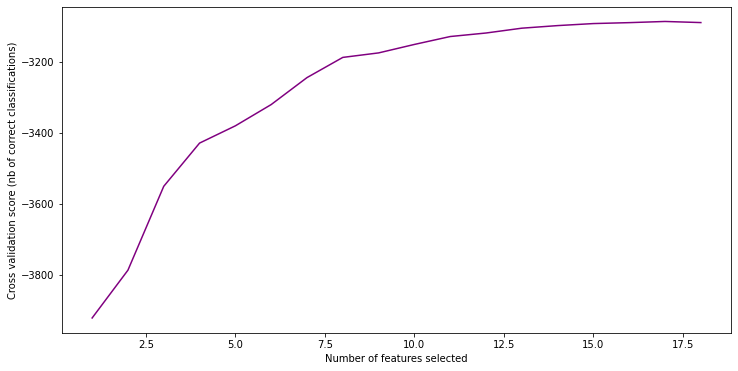

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_, color = 'purple')


plt.show()

### Trying Different Feature Sets

#### Dropping the Paint_Color Variables

In [37]:
cols = [c for c in X_final.columns if c.lower()[:5] != 'paint']
X_final_no_paint = X_final[cols]


rfr_scores = cross_val_score(grid_rfr_2.best_estimator_, X_final_no_paint, y_final, cv=4, scoring = 'neg_root_mean_squared_error')

rmse_rfr_scores_no_paint = -rfr_scores.mean()
rmse_rfr_std_no_paint = rfr_scores.std()

print("mean: ", rmse_rfr_scores_no_paint)
print("standard deviation: ", rmse_rfr_std_no_paint)

mean:  3088.8084311280754
standard deviation:  38.66580880743209


#### Dropping the Manufacturer Variables

In [38]:
cols = [c for c in X_final.columns if c.lower()[:5] != 'manuf']
X_final_no_manuf = X_final[cols]


rfr_scores = cross_val_score(grid_rfr_2.best_estimator_, X_final_no_manuf, y_final, cv=4, scoring = 'neg_root_mean_squared_error')

rmse_rfr_scores_no_manuf = -rfr_scores.mean()
rmse_rfr_std_no_manuf = rfr_scores.std()

print("mean: ", rmse_rfr_scores_no_manuf)
print("standard deviation: ", rmse_rfr_std_no_manuf)

mean:  3497.886724220154
standard deviation:  33.561821354155484


#### Dropping the Drive Variables

In [45]:
cols = [c for c in X_final.columns if c.lower()[:5] != 'drive']
X_final_no_drive = X_final[cols]


rfr_scores = cross_val_score(grid_rfr_2.best_estimator_, X_final_no_drive, y_final, cv=2, n_jobs=-1, scoring = 'neg_root_mean_squared_error')

rmse_rfr_scores_no_drive = -rfr_scores.mean()
rmse_rfr_std_no_drive = rfr_scores.std()

print("mean: ", rmse_rfr_scores_no_drive)
print("standard deviation: ", rmse_rfr_std_no_drive)

mean:  3291.367792531527
standard deviation:  40.00553587753734


#### Dropping the Transmission Variables

In [46]:
cols = [c for c in X_final.columns if c.lower()[:4] != 'tran']
X_final_no_trans = X_final[cols]


rfr_scores = cross_val_score(grid_rfr_2.best_estimator_, X_final_no_trans, y_final, cv=2, n_jobs=-1, scoring = 'neg_root_mean_squared_error')

rmse_rfr_scores_no_trans = -rfr_scores.mean()
rmse_rfr_std_no_trans = rfr_scores.std()

print("mean: ", rmse_rfr_scores_no_trans)
print("standard deviation: ", rmse_rfr_std_no_trans)

mean:  3224.7934624921218
standard deviation:  36.23584689565109


Dropping the paint_color variable didnt have a significant increase in the RMSE value of our model. However, dropping the transmission, the condition, the drive, and the manufacturer led to a significant increase in the RMSE. The percent increase range from 7% to 16%. We conclude the the only variable which we can drop is the paint color since it doesnt affect our model performance. To simplify things, i will not drop the paint_color variable for the time being since it doesnt increase computational time by much.

# 5. Pipeline, Interpretable Model, and Final Testing

### Loading the Data

In [31]:
data = pd.read_csv('cars_train.csv')
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,posting_date
0,7226069143,indianapolis,3495,2005.0,lincoln,lse,good,8 cylinders,gas,181000.0,automatic,rwd,sedan,silver,in,39.640500,-86.311800,2020-11-05T16:19:56-0500
1,7233322668,medford-ashland,11995,2011.0,subaru,impreza,good,4 cylinders,gas,69408.0,automatic,4wd,wagon,blue,or,45.524894,-122.656061,2020-11-18T15:45:51-0800
2,7239134076,austin,68990,2016.0,porsche,cayman gts coupe 2d,good,NaN,gas,7923.0,automatic,rwd,coupe,red,tx,30.260000,-97.740000,2020-11-30T02:13:53-0600
3,7238509078,hawaii,17900,2011.0,bmw,535i,NaN,NaN,gas,50193.0,automatic,NaN,sedan,black,hi,21.293854,-157.837158,2020-11-28T13:57:30-1000
4,7236364831,daytona beach,9500,2006.0,NaN,mazada miata,excellent,4 cylinders,gas,52864.0,automatic,rwd,convertible,blue,fl,29.172023,-81.027367,2020-11-24T12:48:43-0500


### Preparation

In [5]:
def preparation(data):
    data=data[(data.price > 1000 ) & (data.price <40000)]
    data=data[(data.odometer > 1000 ) & (data.odometer <250000)]

    data['age'] = data['year'].max() - data['year']

    data.drop(['posting_date', 'state', 'region', 'id', 'long', 'lat', 'model', 'year'], inplace = True, axis = 1)
    
    return data

In [ ]:
data=preparation(data)

X = data.drop('price', axis = 1)
y = data[['price']]

X_features_num = X.select_dtypes(include=[np.number])
X_features_cat = X.select_dtypes(exclude=[np.number])

### Building the Pipelines

In [34]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('power_transformer', PowerTransformer(method='yeo-johnson')),])

In [35]:
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('one_hot', OneHotEncoder(drop = 'first')),])

In [36]:
num_attribs = list(X_features_num)
cat_attribs = list(X_features_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),])

### Linear Regression

In [ ]:
full_pipeline_with_linear = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

parameters_linear = {
    'linear__fit_intercept': [True, False],
    'linear__normalize': [True, False],
}

In [ ]:
grid_search_linear = GridSearchCV(full_pipeline_with_linear, parameters_linear, scoring = 'neg_root_mean_squared_error', n_jobs=-1, verbose=1, cv=3, refit=True)
grid_search_linear.fit(X, y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('power_transformer',
                                                                                          PowerTransformer())]),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                              

In [ ]:
print("Best score: %0.3f" %  - grid_search_linear.best_score_)
print("Best parameters set:")

best_parameters_linear = grid_search_linear.best_estimator_.get_params()

for param_name in sorted(parameters_linear.keys()):
    print("\t%s: %r" % (param_name, best_parameters_linear[param_name]))

Best score: 5302.129
Best parameters set:
	linear__fit_intercept: True
	linear__normalize: False


### Decision Tree

In [ ]:
full_pipeline_with_decision = Pipeline([
        ("preparation", full_pipeline),
        ("decision", DecisionTreeRegressor())
    ])

parameters_decision = {
    'decision__min_samples_split': [2, 5, 10],
    'decision__splitter': ['best', 'random'],
    'decision__max_depth': [None, 50, 80, 100]
}

In [ ]:
grid_search_decision = GridSearchCV(full_pipeline_with_decision, parameters_decision, scoring = 'neg_root_mean_squared_error', n_jobs=-1, verbose=1, cv=3, refit=True)
grid_search_decision.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('power_transformer',
                                                                                          PowerTransformer())]),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                              

In [ ]:
print("Best score: %0.3f" %  - grid_search_decision.best_score_)
print("Best parameters set:")

best_parameters_decison = grid_search_decision.best_estimator_.get_params()

for param_name in sorted(parameters_decision.keys()):
    print("\t%s: %r" % (param_name, best_parameters_decison[param_name]))

Best score: 3751.516
Best parameters set:
	decision__max_depth: 80
	decision__min_samples_split: 10
	decision__splitter: 'random'


### Decision Tree Further Optimization

In [ ]:
full_pipeline_with_decision1 = Pipeline([
        ("preparation", full_pipeline),
        ("decision", DecisionTreeRegressor(max_depth = 80, splitter = 'random'))
    ])

parameters_decision1 = {
    'decision__min_samples_split': [8, 10, 12, 15, 20],
}

In [ ]:
grid_search_decision1 = GridSearchCV(full_pipeline_with_decision1, parameters_decision1, scoring = 'neg_root_mean_squared_error', n_jobs=-1, verbose=1, cv=3, refit=True)
grid_search_decision1.fit(X, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('power_transformer',
                                                                                          PowerTransformer())]),
                                                                         ['odometer',
                                                                          'age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                               

In [ ]:
print("Best score: %0.3f" %  - grid_search_decision1.best_score_)
print("Best parameters set:")

best_parameters_decison1 = grid_search_decision1.best_estimator_.get_params()

for param_name in sorted(parameters_decision1.keys()):
    print("\t%s: %r" % (param_name, best_parameters_decison1[param_name]))

Best score: 3738.152
Best parameters set:
	decision__min_samples_split: 20


## Final Model

In [36]:
final_model = Pipeline([
        ("preparation", full_pipeline),
        ("model", grid_rfr_2.best_estimator_)])

In [37]:
final_model.fit(X, y)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  ['odometer', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['manufacturer', 'condition

In [ ]:
filename = 'best_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

## Testing our Final Model

In [43]:
os.chdir(r'C:\Users\samer\OneDrive - American University of Beirut\Desktop\Assignment5')
cars_test = pd.read_csv('cars_test.csv', encoding='utf8')

In [47]:
cars_test = preparation(cars_test)
X_test = cars_test.drop('price', axis = 1)
y_test = cars_test[['price']]

In [ ]:
file = open("best_model.pkl",'rb')
final_model = pickle.load(file)

In [48]:
final_model_score = np.sqrt(mean_squared_error(y_test, final_model.predict(X_test)))
print(final_model_score)

4836.347533502345


Personally, i believe that the dataset which contains more than 300,000 rows is enough for such a problem. The row to column ratio is excellent. We have a small number of predictor variables and thus the number of rows is good enough especially that most of the predictor variables are categorical ones with few possible values. What could be done however is collecting additional data such as the number of accidents the car has done, the number of previous owners, etc. This could help in building a better predictive model.